## **Model Simple RNN**

---

Uji Coba #1

Penelitian                             : [link Dataset](https://github.com/katoch99/Twitter-Emotion-Recognition)

### 01. Installing nlp package

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import numpy as np

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import seaborn as sns


### 02. Load Data

In [2]:
df = pd.read_csv('..\Dataset\Training\Clean_train_data.csv')
df.head(20)

,Unnamed: 0,tweet,label
0,0,"['pagi', 'emosi']",Anger
1,1,"['stabilitas', 'negara', 'memange', 'tahun', '...",Anger
2,2,"['emosi', 'liat']",Anger
3,3,"['aib', 'bodoh', 'aib', 'muncul', 'tindak', 'k...",Anger
4,4,"['sebal', 'bodoh']",Anger
5,5,"['asli', 'malu', 'maluin', 'indo', 'tolol', 'r...",Anger
6,6,"['drama', 'abg', 'tolol']",Anger
7,7,"['emosi', 'katla', 'kemarin', 'terang', 'gin',...",Anger
8,8,"['bangsat', 'tribute', 'no', 'bencana', 'no', ...",Anger
9,9,"['pergi', 'teriak', 'nang', 'kencang', 'kencan...",Anger


In [3]:
print("Null Values:")
df.isna().sum()

Null Values:


Unnamed: 0    0
tweet         0
label         0
dtype: int64

### 03. Label Proposition

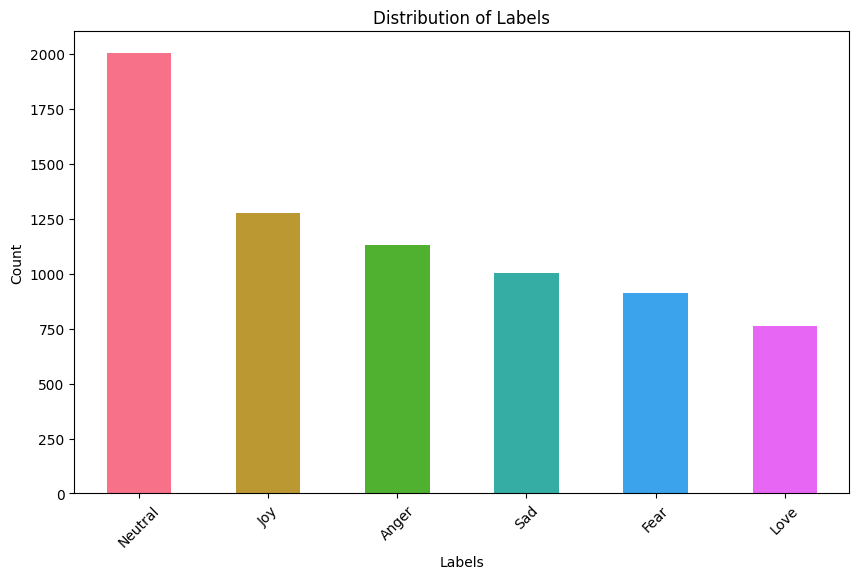

In [4]:
label_counts = df["label"].value_counts()

# Generate a color palette with a unique color for each label
palette = sns.color_palette("husl", len(label_counts))

# Create a bar plot
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color=palette)
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [5]:
def get_tweets(data):
    tweets = data['tweet'].tolist()
    labels = data['label'].tolist()
    return tweets, labels

tweets, labels = get_tweets(df)

In [6]:
train_tweets, val_tweets, train_labels, val_labels = train_test_split('Tweet', 'Label', test_size=0.2, random_state=42)

In [7]:
data = pd.DataFrame({'Tweet': tweets, 'Label': labels})

train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

train_tweets = train_data['Tweet'].tolist()
train_labels = train_data['Label'].tolist()
val_tweets = val_data['Tweet'].tolist()
val_labels = val_data['Label'].tolist()

print("Training Tweets:", train_tweets)
print("Training Labels:", train_labels)
print("Validation Tweets:", val_tweets)
print("Validation Labels:", val_labels)


Training Tweets: ["['sayur', 'dhe']", "['makasih', 'kakak', 'bianca', 'nama', 'kakak', 'cantik', 'oh', 'suka', 'suka', 'bagus', 'genre', 'horror', 'sukaa', 'genre', 'pilih', 'thriller']", "['aa', 'lucu', 'sannie', 'takut', 'gedee', 'imut']", "['gubernur', 'cumut', 'diam', 'nanggepin', 'keledai', 'bodoh', 'akibat', 'malu', 'diemin', 'tar', 'abis', 'jabat']", "['sumpah', 'benci', 'kaya', 'gin', 'suka', 'diam', 'bikin', 'sakit', 'hati', 'gimana', 'sakit', 'anak', 'digituin', 'mb', 'sempurna', 'benci', 'mandang', 'fisik']", "['mari', 'kak', 'viu', 'start', 'puas', 'pakai', 'req', 'harga', 'payment', 'via', 'shopee', 'pay', 'tutup', 'shopee', 'pay', 'error', 'ready', 'preset', 'lightroom', 'via', 'gdrive', 'no', 'rush', 'order']", "['suka', 'cinta', 'kagum']", "['komen', 'buruk', 'otak', 'kayak', 'tolol']", "['cantik', 'biazaahh', 'foto', 'model', 'foto', 'konsep', 'pikir', 'mas', 'crush', 'temenku', 'sedih']", "['ttapi', 'suka', 'pakai', 'aksen', 'british', 'paham', 'dengernya', 'enakeun']

### Padding and Truncating Sequences

In [8]:
# Tokenizer initialization and fitting on training data
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(train_tweets)

print(tokenizer.texts_to_sequences([tweets[10]]))

[[59, 7, 56]]


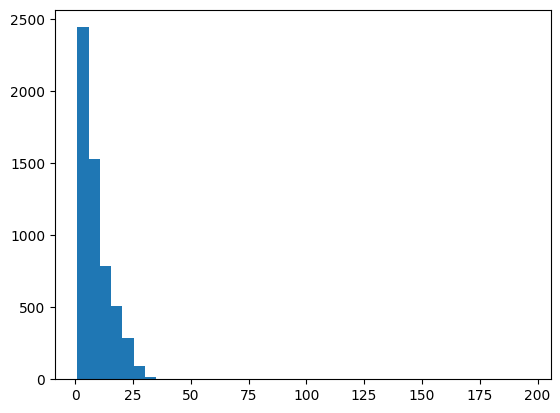

In [9]:
lengths = [len(t.split(' ')) for t in train_tweets]

plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [10]:
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    if sequences:
        padded_sequences = pad_sequences(sequences, truncating='post', maxlen=50, padding='post')
        return padded_sequences
    else:
        return None

In [11]:
padded_train_sequences = get_sequences(tokenizer, train_tweets)

In [12]:
padded_train_sequences[10]

array([  69,  985,  513,   39,  480,  985, 1332,   47,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

### Menyiapkan Label

In [13]:
classes = set(labels)
print(classes)

{'Sad', 'Love', 'Joy', 'Fear', 'Neutral', 'Anger'}


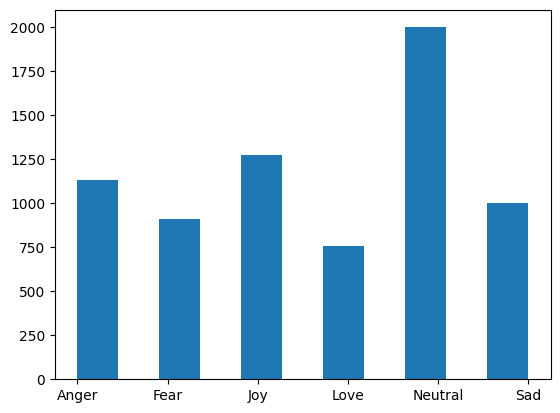

In [14]:
plt.hist(labels, bins=11)
plt.show()

In [15]:
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_classes = dict((v, k) for k, v in classes_to_index.items())

In [16]:
classes_to_index

{'Sad': 0, 'Love': 1, 'Joy': 2, 'Fear': 3, 'Neutral': 4, 'Anger': 5}

In [17]:
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

In [18]:
# Converting text sequences to sequences of integers
padded_train_sequences = get_sequences(tokenizer, train_tweets)
val_sequences = get_sequences(tokenizer, val_tweets)

# Mapping label names to integer indices
train_labels = names_to_ids(train_labels)
val_labels = names_to_ids(val_labels)

In [19]:
print(val_labels)

[0 0 5 ... 4 0 1]


### Modelling

In [20]:
import tensorflow as tf

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=50),
    tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


c:\Users\TEMP\miniconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [21]:
h = model.fit(
    padded_train_sequences, train_labels,
    validation_data=(val_sequences, val_labels),
    epochs=50,
    #callbacks=[early_stopping_callback]
)

Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.2877 - loss: 1.7462 - val_accuracy: 0.2747 - val_loss: 1.7421
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3242 - loss: 1.6409 - val_accuracy: 0.3242 - val_loss: 1.6966
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5766 - loss: 1.2374 - val_accuracy: 0.3185 - val_loss: 1.7784
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7389 - loss: 0.8763 - val_accuracy: 0.3213 - val_loss: 1.9799
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8376 - loss: 0.5938 - val_accuracy: 0.2966 - val_loss: 2.1273
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8849 - loss: 0.4292 - val_accuracy: 0.2980 - val_loss: 2.3118
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9059 - loss: 0.3401 - val_accuracy: 0.3079 - val_loss: 2.3980
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9215 - loss: 0.2812 - val_accuracy: 0

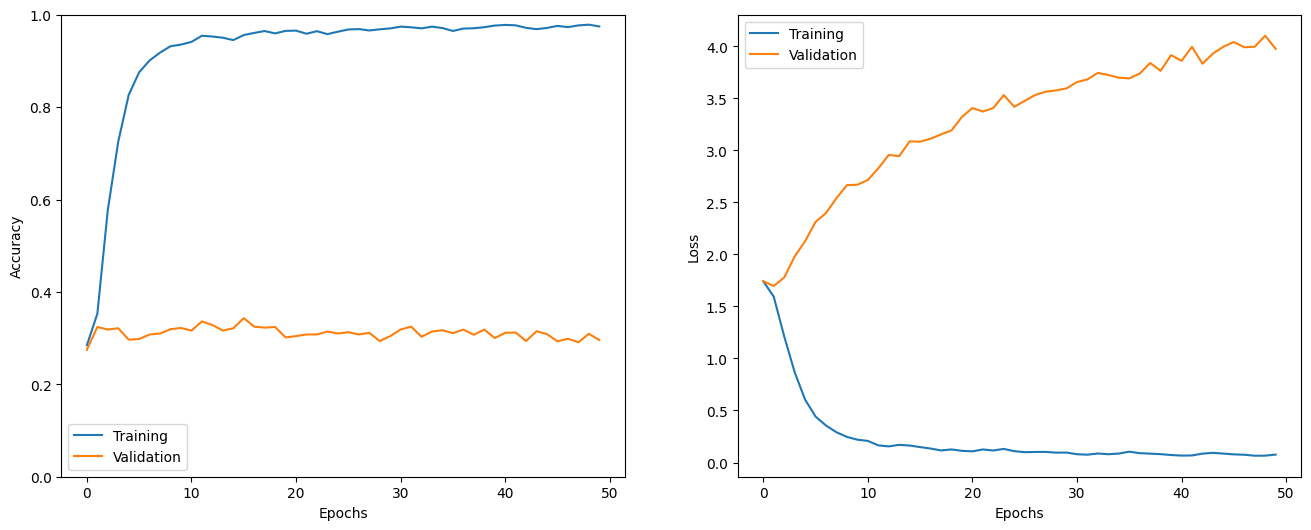

In [22]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

show_history(h)

In [23]:
test = pd.read_csv('..\Dataset\\Training\\not_preposessing.csv')

In [24]:
test_tweets, test_labels = get_tweets(test)
test_sequences = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [25]:
eval = model.evaluate(test_sequences, test_labels)

222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1322 - loss: 4.1986


In [26]:
for a in range(0,5):
  i = random.randint(0, len(test_labels) - 1)

  print('Tweet:', test_tweets[i])
  print('Actual Emotion:', index_to_classes[test_labels[i]])
  pred_prob = model.predict(np.expand_dims(test_sequences[i], axis=0))
  predicted_class_index = np.argmax(pred_prob)
  predicted_class = index_to_classes[predicted_class_index]
  
  print('Predicted Emotion:', predicted_class, '\n')

Tweet: tiba-tiba keinget, dulu pas ospek ada senior yang baik banget sama aku, sampe diajak ngobrol pake bahasanya dia, aku gak ngerti dong, ternyata dia pikir sekolah asalku dari provinsi dia padahal beda haha tapiya tetep baik sih, cuma dia agak malu aja tiap ketemu
Actual Emotion: Joy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Predicted Emotion: Joy 

Tweet: semangat buat kamu yang lagi latihan, ya walaupun gak ke notice. semangat
Actual Emotion: Joy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Emotion: Joy 

Tweet: yahh sedih bgt
Actual Emotion: Sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Emotion: Neutral 

Tweet: betul org cakap, kalau tak bodoh bukan bn namanya..
Actual Emotion: Anger
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Emotion: Joy 

Tweet: lu ga lebih dri org iri yg kebetulan tolol.
Actual Emotion: Anger
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Emotion: Joy 

